In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
import LASCO_catalog as lasco
import flare_persist as fp
import wind_waves_scratch as ww

import pandas as pd
import matplotlib as plt
import numpy as np

In [120]:
#read in lasco flare catalog 
#lasco_df = lasco.read_lasco_cat()
lasco_df = pd.read_csv("LASCO_cat.csv")

#read in the original control events xls file
flare_df = pd.read_excel("ControlEvents_student.xls")

In [121]:
#add in the CME widths to the files flare that are missing that info
flare_df = lasco.add_cme_width(flare_df,lasco_df)

#adding y label column indicating positive and negative SEP events - SEP events have Association = ProtonFlare
flare_df['sep'] = flare_df.Association.str.contains('^Proton').astype(int)

#convert the type II and type IV association to binary 
flare_df.TypeII = (flare_df.TypeII.str.lower() == "yes").astype(int)
flare_df.TypeIV = (flare_df.TypeIV.str.lower() == "yes").astype(int)

# Remove rows where optlocation = nan
flare_df = flare_df[flare_df.optlocation.astype('str') != 'nan']

#drop 7 samples where dfTrain FlrIntFlux2 is erroneously greater than 1000.0 (all control events)
flare_df = flare_df[flare_df.FlrIntFlux2 < 1000.0]

#replace all -1 cmespeed values with NaN
flare_df.cmespeed.replace(-1,np.nan, inplace = True)



/Users/hazelbain/Dropbox/SEPML/SEPML/LASCO_catalog.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  flare_df['Width'][idx] = width


In [123]:
#once the RAD1 data has copied over =, run the rad1 analysis
flare_df= ww.rad1_analysis(flare_df)
flare_df['typeIII_int'] = flare_df['1MHz_fluence']

/Users/hazelbain/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [127]:
#save the csv file before running persistence in case the code dies

#!!!!!! UPDATE THE NAME OF THE CSV TO INCLUDE LIST OF FEATURES INCLUDED AND YEARS !!!!
flare_df.to_csv('ControlEvents_1986_2004_allfeat.csv')


In [135]:
#run flare persistence for 24 hours
flare_df  = fp.flare_persistence(flare_df,24)

In [154]:
#Re save the dataframe once flare persistence has finished

#!!!!!! UPDATE THE NAME OF THE CSV TO INCLUDE LIST OF FEATURES INCLUDED AND YEARS !!!!

flare_df.to_csv('ControlEvents_1986_2004_allfeat2.csv')

In [149]:
tmp = flare_df[flare_df.FlarePersistence.isna()]

In [153]:
tmp.query('sep == 1')

,FlrOnset,Flrmaxtime,Flrendtime,FlrPeakFlux,Flareq,xrsclass,optclass,optlocation,region,radiopatrol,...,S3,S4,S5,GT100,Width,sep,1MHz_fluence,1MHz_close_freq,typeIII_int,FlarePersistence
2267,1991-09-29T14:56:00.000,1991-09-29T15:33:00.000,1991-09-29T18:56:00.000,0.000073,16.0,M7.3,4B,S21E32,6853,Yes,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2319,1991-10-27T05:36:00.000,1991-10-27T05:47:00.000,1991-10-27T07:21:00.000,0.000614,-1.0,X6.1,3B,S13E15,6891,Yes,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2640,1992-05-08T14:43:00.000,1992-05-08T15:45:00.000,1992-05-09T08:37:00.000,0.000074,16.0,M7.4,4B,S26E08,7154,Yes,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2677,1992-08-03T06:21:00.000,1992-08-03T07:06:00.000,1992-08-03T08:23:00.000,0.000048,16.0,M4.8,1N,S09E68,7248,Yes,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2805,1993-03-12T16:02:00.000,1993-03-12T18:15:00.000,1993-03-12T23:43:00.000,0.000070,16.0,M7.0,3B,S00W51,7440,Yes,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [198]:
len(flare_df.query('FlarePersistence != "NaN" and tchianti != "NaN" and optlocation != "NaN" '))

3858

In [194]:
len(flare_df.query('sep == 0'))

3812

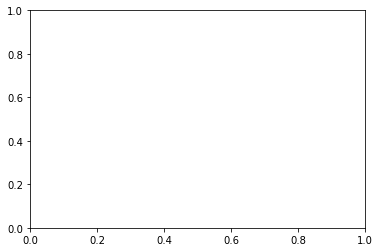

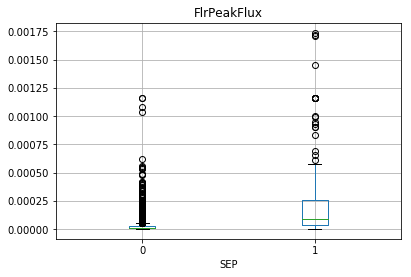

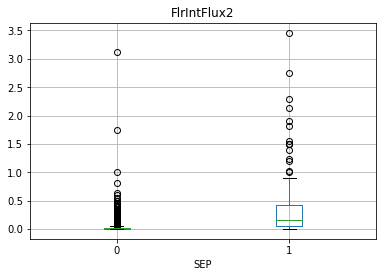

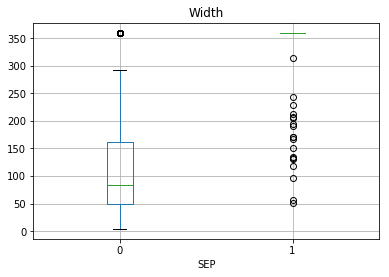

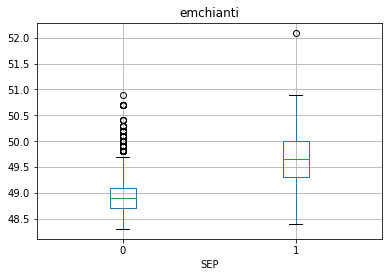

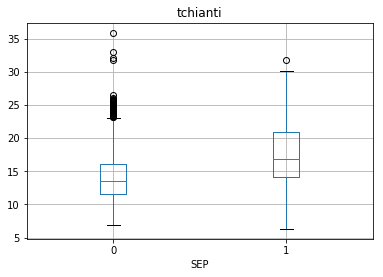

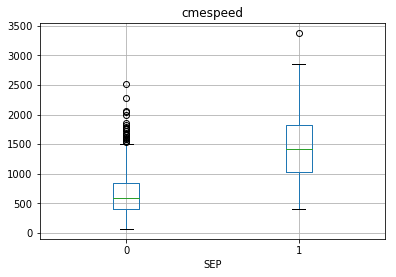

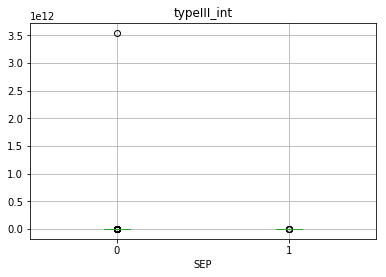

In [82]:
import matplotlib.pyplot as plt
import numpy as np


#plt.subplot(3,3,1)
boxplt = flare_df.boxplot(column = 'FlrPeakFlux',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')

boxplt = flare_df.boxplot(column = 'FlrIntFlux2',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'Width',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
#plt.show()

boxplt = flare_df.boxplot(column = 'emchianti',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'tchianti',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'cmespeed',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

# boxplt = flare_df.boxplot(column = 'FlarePersistence',by = 'sep',layout = (1,1))
# [ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
# fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
# fig.suptitle('')
# plt.show()

boxplt = flare_df.boxplot(column = 'typeIII_int',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()
